In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import datetime as dt
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


## Funciones

Esta función la llamamos a un data set para normalizar los nombres de los estados 

In [2]:
def nom_est():
        #nombre de los estados
    nam = pd.read_html('https://es.wikipedia.org/wiki/Estado_de_los_Estados_Unidos')[1]
    nam = nam[['Abrev.','Estado']]
    nam.rename(columns={'Abrev.':'state', 'Estado':'state_name'}, inplace=True)
    return nam

Realizamos la carga de la data, normalizamos y lo implementamos

In [3]:
def cargarData():
    # Descargar los datos
    df = pd.read_csv(r'C:\Users\x\OneDrive\Escritorio\Agus\Henry DATA 02\DS-PI-ProyectoIndividual\report\COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')
    df = pd.merge(df, nom_est()[['state', 'state_name']], on='state', how='left')
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(['date'])
    df['Year'] = pd.DatetimeIndex(df['date']).year
    df.reset_index(drop=True, inplace=True)

    return df

### Inportación de los datos

In [4]:
nam = nom_est()
df = cargarData()

In [5]:
df

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,state_name,Year
0,NC,2020-01-01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,Carolina del Norte,2020
1,HI,2020-01-01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,Hawái[9]​,2020
2,PR,2020-01-01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2020
3,AL,2020-01-01,0,0,1,0,0,1,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,Alabama,2020
4,IN,2020-01-01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,Indiana,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47580,IA,2022-08-04,1,87,37,2,89,34,13.0,123,...,0.0,123,1.0,123,35.0,123,77.0,123,Iowa,2022
47581,PR,2022-08-04,0,9,56,8,37,20,7.0,58,...,2.0,58,0.0,63,28.0,63,89.0,60,NaN,2022
47582,WI,2022-08-04,21,106,24,19,108,24,12.0,148,...,0.0,148,0.0,148,97.0,148,123.0,148,Wisconsin,2022
47583,IN,2022-08-04,10,149,3,2,36,124,2.0,160,...,0.0,160,4.0,160,92.0,160,209.0,160,Indiana,2022


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47585 entries, 0 to 47584
Columns: 137 entries, state to Year
dtypes: datetime64[ns](1), float64(77), int64(57), object(2)
memory usage: 49.7+ MB


##### 1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [7]:
df_5 = df.loc[:,['state', 'date','inpatient_beds', 'inpatient_beds_used_covid', ]]
df_5 = df_5.loc[(df_5['date'] >= '2020-01-01') & (df_5['date'] <= '2020-06-30')]

In [8]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6694 entries, 0 to 6693
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   state                      6694 non-null   object        
 1   date                       6694 non-null   datetime64[ns]
 2   inpatient_beds             6689 non-null   float64       
 3   inpatient_beds_used_covid  6610 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 261.5+ KB


In [9]:
df_5.isna().sum()

state                         0
date                          0
inpatient_beds                5
inpatient_beds_used_covid    84
dtype: int64

In [10]:
df_05 = df_5[df_5['inpatient_beds'].notna()] #Para eliminar nan
df_05 = df_05.fillna(0) #Remplzar nan por 0

In [11]:
df_05['Porcentaje_camas_usadas'] = df_05['inpatient_beds_used_covid'] / df_05['inpatient_beds'] # Porcentaje camas usadas


In [12]:
df_05

,state,date,inpatient_beds,inpatient_beds_used_covid,Porcentaje_camas_usadas
0,NC,2020-01-01,72.0,0.0,0.000000
1,HI,2020-01-01,0.0,0.0,NaN
2,PR,2020-01-01,146.0,0.0,0.000000
3,AL,2020-01-01,6.0,0.0,0.000000
4,IN,2020-01-01,30.0,0.0,0.000000
...,...,...,...,...,...
6689,NE,2020-06-30,5278.0,159.0,0.030125
6690,TX,2020-06-30,55503.0,7171.0,0.129200
6691,IN,2020-06-30,15289.0,650.0,0.042514
6692,AZ,2020-06-30,10316.0,4843.0,0.469465


In [13]:
df_05 = df_05.groupby('state')['Porcentaje_camas_usadas'].mean()
df_05 = df_05.reset_index()


In [14]:
top5_porcentaje = pd.merge(df_05, nam[['state', 'state_name']], on =['state'], how='left')
primera = top5_porcentaje.pop('state_name')
top5_porcentaje.insert(0, 'state_name', primera)
top5_porcentaje = top5_porcentaje.sort_values(by=['Porcentaje_camas_usadas'], ascending=False)
top5_porcentaje['Porcentaje_camas_usadas'] = top5_porcentaje['Porcentaje_camas_usadas'] * 100
top5_porcentaje.head()



,state_name,state,Porcentaje_camas_usadas
34,Nueva York[19]​,NY,21.347304
31,Nueva Jersey[17]​,NJ,20.240464
19,Massachusetts,MA,17.767949
6,Connecticut,CT,14.550693
18,Luisiana[10]​,LA,13.784827


In [15]:
print('Los estados que ocuparon mas camas pediatricos \n' , top5_porcentaje.head().to_markdown() )

Los estados que ocuparon mas camas pediatricos 
 |    | state_name       | state   |   Porcentaje_camas_usadas |
|---:|:-----------------|:--------|--------------------------:|
| 34 | Nueva York[19]​   | NY      |                   21.3473 |
| 31 | Nueva Jersey[17]​ | NJ      |                   20.2405 |
| 19 | Massachusetts    | MA      |                   17.7679 |
|  6 | Connecticut      | CT      |                   14.5507 |
| 18 | Luisiana[10]​     | LA      |                   13.7848 |


In [19]:
# Plotting 20 Paises 2021
fig = px.bar(top5_porcentaje.head(5), x='state', y='Porcentaje_camas_usadas', color='Porcentaje_camas_usadas', title='Top 5 Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020')
fig.update_layout( title='Top 5 Estados con mayor ocupación hospitalaria por COVID',
                        title_x=0.15,
                        margin=dict(t=70, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=360,
                    
                        xaxis_title='Estados', yaxis_title="Porcentaje_camas_usadas",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                        font=dict(color='white'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                        )


# guardar figura
fig.write_image("images/yourfile2.jpg") 
fig.show()

#### 2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

Intervalos de crecimiento y decrecimiento
Puntos críticos (mínimos y máximos)

In [22]:
# Obtenemos los campos requeridos
data = df.loc[:,['state', 'date', 'inpatient_beds', 'inpatient_beds_used_covid']]
data = data.loc[(data['date'] >= '2020-03-22') & (data['date'] <= '2020-06-13')]
data = data[data['state']== 'NY']
data_fin = data.copy()

In [23]:
data

,state,date,inpatient_beds,inpatient_beds_used_covid
1412,NY,2020-03-22,2171.0,324.0
1470,NY,2020-03-23,2176.0,417.0
1505,NY,2020-03-24,2176.0,554.0
1566,NY,2020-03-25,2707.0,843.0
1615,NY,2020-03-26,2730.0,992.0
...,...,...,...,...
5532,NY,2020-06-09,34793.0,3001.0
5629,NY,2020-06-10,34580.0,2835.0
5647,NY,2020-06-11,35428.0,2772.0
5693,NY,2020-06-12,35758.0,2638.0


In [24]:

min_used = data['inpatient_beds_used_covid'].min()
max_used= data['inpatient_beds_used_covid'].max()

In [25]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(
        x= data['date'],
        y=data['inpatient_beds_used_covid'])],
    layout_title_text="Ocupación de camas por COVID en el Estado de Nueva York durante la cuarentena"
)
fig.show()

In [26]:

print('Se puede ver como al principio hubo una exploción de casos de COVID (sobre todo desde el 02 de abril hasta el 24 de abril del 2020 que superaron las 12.000 camas ocupadas) que luego fue progresivamente disminuyendo. La máxima ocupación de camas de COVID fue',max_used, 'y la mínima ocupación de camas de COVID fue', min_used)


Se puede ver como al principio hubo una exploción de casos de COVID (sobre todo desde el 02 de abril hasta el 24 de abril del 2020 que superaron las 12.000 camas ocupadas) que luego fue progresivamente disminuyendo. La máxima ocupación de camas de COVID fue 14126.0 y la mínima ocupación de camas de COVID fue 324.0


In [27]:

print('La mínima ocupación de camas de casos COVID confirmados fue el día', data['date'][(data['inpatient_beds_used_covid'])==324.0],
'y la máxima ocupación de camas de casos COVID confirmado fue el día', data['date'][(data['inpatient_beds_used_covid'])==14126.0])

La mínima ocupación de camas de casos COVID confirmados fue el día 1412   2020-03-22
Name: date, dtype: datetime64[ns] y la máxima ocupación de camas de casos COVID confirmado fue el día 2593   2020-04-14
Name: date, dtype: datetime64[ns]


In [28]:

min_inpatient= data['inpatient_beds'].min()
max_inpatient = data['inpatient_beds'].max()

In [29]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(
        x= data['date'],
        y=data['inpatient_beds'])],
    layout_title_text="Ocupación de camas en el Estado de Nueva York durante la cuarentena"
)
fig.show()

In [30]:
print('Pero a pesar de que la mínima y máxima son parecidas (la máxima ocupación de camas fue', max_inpatient, 'y la mínima ocupación camas fue', min_inpatient ,'), la saturación del sistema de salud que se había gestado a partir de la pandemia continuo. Apenas disminuyó el uso de camas comunes, como se puede ver en el segundo gráfico.')


Pero a pesar de que la mínima y máxima son parecidas (la máxima ocupación de camas fue 40559.0 y la mínima ocupación camas fue 2171.0 ), la saturación del sistema de salud que se había gestado a partir de la pandemia continuo. Apenas disminuyó el uso de camas comunes, como se puede ver en el segundo gráfico.


In [31]:
print('La mínima ocupación de camas comunes fue el día', data['date'][(data['inpatient_beds'])==1588.0],
'y la máxima ocupación de camas comunes fue el día', data['date'][(data['inpatient_beds'])==27068.0])

La mínima ocupación de camas comunes fue el día Series([], Name: date, dtype: datetime64[ns]) y la máxima ocupación de camas comunes fue el día Series([], Name: date, dtype: datetime64[ns])


#### 3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [32]:
df_03 = df.loc[:,['state', 'date', 'inpatient_beds', 'adult_icu_bed_utilization_numerator', 'staffed_pediatric_icu_bed_occupancy']]
df_03['Year'] = pd.DatetimeIndex(df_03['date']).year
# Por año
df_03 = df_03.loc[(df_03['Year'] == 2020)]

In [33]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16445
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   state                                16446 non-null  object        
 1   date                                 16446 non-null  datetime64[ns]
 2   inpatient_beds                       16441 non-null  float64       
 3   adult_icu_bed_utilization_numerator  9250 non-null   float64       
 4   staffed_pediatric_icu_bed_occupancy  8711 non-null   float64       
 5   Year                                 16446 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 899.4+ KB


In [34]:
df_03.isna().sum()

state                                     0
date                                      0
inpatient_beds                            5
adult_icu_bed_utilization_numerator    7196
staffed_pediatric_icu_bed_occupancy    7735
Year                                      0
dtype: int64

In [35]:
len(df_03.date.unique())

366

In [36]:
df_03 = df_03.dropna()



In [37]:
df_03['total_icu_bed_use'] = df_03['adult_icu_bed_utilization_numerator'] + df_03['staffed_pediatric_icu_bed_occupancy']

In [38]:
df_03 = df_03.groupby('state')['total_icu_bed_use'].sum()
df_03 = df_03.reset_index()
df_03['Total_camas'] = df_03.total_icu_bed_use / 254

In [39]:
top5_camas = pd.merge(df_03, nam[['state', 'state_name']], on =['state'], how='left')
primera = top5_camas.pop('state_name')
top5_camas.insert(0, 'state_name', primera)
top5_camas = top5_camas.sort_values(by=['Total_camas'], ascending=False)
top5_camas = top5_camas.round()
top5_camas.head()

,state_name,state,total_icu_bed_use,Total_camas
4,California,CA,1121942.0,4417.0
44,Texas[27]​,TX,1040559.0,4097.0
9,Florida,FL,894830.0,3523.0
34,Nueva York[19]​,NY,621846.0,2448.0
38,Pensilvania[25]​,PA,553670.0,2180.0


In [40]:
print('Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020 \n' , top5_camas.head().to_markdown() )

Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020 
 |    | state_name      | state   |   total_icu_bed_use |   Total_camas |
|---:|:----------------|:--------|--------------------:|--------------:|
|  4 | California      | CA      |         1.12194e+06 |          4417 |
| 44 | Texas[27]​       | TX      |         1.04056e+06 |          4097 |
|  9 | Florida         | FL      |    894830           |          3523 |
| 34 | Nueva York[19]​  | NY      |    621846           |          2448 |
| 38 | Pensilvania[25]​ | PA      |    553670           |          2180 |


In [41]:
# Plotting 5 Países 
fig = px.bar(top5_camas.head(5), x='state_name', y='Total_camas',color='Total_camas', title='Top 5 Países que utilizan Energia Total_camas ')
fig.update_layout( title='Top 5 Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020 ',
                            title_x=0.15,
                            margin=dict(t=70, b=0, l=70, r=40),
                            hovermode="x unified",
                            xaxis_tickangle=360,
                        
                            xaxis_title='Estados', yaxis_title="Total_camas ",
                            plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                            title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                            font=dict(color='white'),
                            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                            )
fig.show()

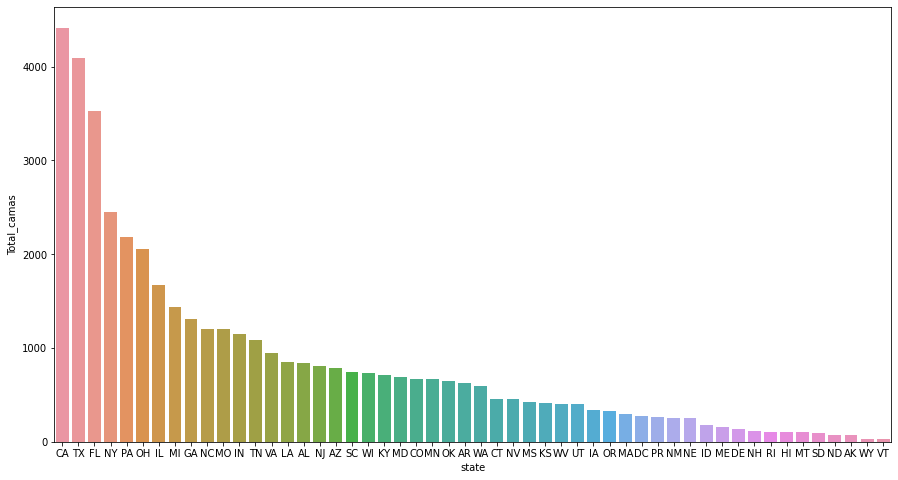

In [45]:
ax = sns.barplot(x="state", y="Total_camas", data=top5_camas)
plt.gcf().set_size_inches(15, 8)
# plt.savefig("Total_camas2.box.jpg", bbox_inches='tight')

In [43]:
top05_3 = top5_camas.round()
df_03 = df_03.sort_values('total_icu_bed_use', ascending=False)

In [46]:
print('Los estados con ocuparon mas camas UCI, 2020: \n' , top05_3.head(5).to_markdown() )


Los estados con ocuparon mas camas UCI, 2020: 
 |    | state_name      | state   |   total_icu_bed_use |   Total_camas |
|---:|:----------------|:--------|--------------------:|--------------:|
|  4 | California      | CA      |         1.12194e+06 |          4417 |
| 44 | Texas[27]​       | TX      |         1.04056e+06 |          4097 |
|  9 | Florida         | FL      |    894830           |          3523 |
| 34 | Nueva York[19]​  | NY      |    621846           |          2448 |
| 38 | Pensilvania[25]​ | PA      |    553670           |          2180 |


### 4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [47]:
df_2020 = df.loc[:,['state', 'state_name', 'date', 'inpatient_beds', 'all_pediatric_inpatient_bed_occupied']]
df_2020['Year'] = pd.DatetimeIndex(df_2020['date']).year

#Por año
df_2020 = df_2020.loc[(df_2020['Year'] == 2020)]

In [48]:
df_2020.isna().sum()

state                                      0
state_name                               858
date                                       0
inpatient_beds                             5
all_pediatric_inpatient_bed_occupied    7731
Year                                       0
dtype: int64

In [49]:
df_2020 = df_2020.dropna()
tamaño = len(df_2020.date.unique())

In [50]:
df_2020 = df_2020.groupby('state')['all_pediatric_inpatient_bed_occupied'].sum()
df_2020 = df_2020.reset_index()

In [51]:
df_2020['Total_camas_pediatricos'] = df_2020['all_pediatric_inpatient_bed_occupied'] / tamaño

In [53]:
top5_pediatric = pd.merge(df_2020, nam[['state', 'state_name']], on =['state'], how='left')
primera = top5_pediatric.pop('state_name')
top5_pediatric.insert(0, 'state_name', primera)
top5_pediatric = top5_pediatric.sort_values(by=['Total_camas_pediatricos'], ascending=False)
top5_pediatric = top5_pediatric.round()
top5_pediatric.head()

,state_name,state,all_pediatric_inpatient_bed_occupied,Total_camas_pediatricos
0,California,CA,483142.0,1902.0
1,Nueva York[19]​,NY,440362.0,1734.0
2,Pensilvania[25]​,PA,280480.0,1104.0
3,Illinois,IL,274279.0,1080.0
4,Míchigan[13]​,MI,233298.0,918.0


In [58]:
print('Los estados que ocuparon mas camas pediatricos \n' , top5_pediatric.head(10).to_markdown() )


Los estados que ocuparon mas camas pediatricos 
 |    | state_name      | state   |   all_pediatric_inpatient_bed_occupied |   Total_camas_pediatricos |
|---:|:----------------|:--------|---------------------------------------:|--------------------------:|
|  0 | California      | CA      |                                 483142 |                      1902 |
|  1 | Nueva York[19]​  | NY      |                                 440362 |                      1734 |
|  2 | Pensilvania[25]​ | PA      |                                 280480 |                      1104 |
|  3 | Illinois        | IL      |                                 274279 |                      1080 |
|  4 | Míchigan[13]​    | MI      |                                 233298 |                       918 |
|  5 | Ohio            | OH      |                                 212064 |                       835 |
|  6 | Florida         | FL      |                                 199158 |                       784 |
|  7 | Misur

In [59]:
# Creacion de dataframe
top5_pediatric_bar = pd.DataFrame(top5_pediatric, columns=['state', 'state_name', 'Total_camas_pediatricos']).sort_values(by='Total_camas_pediatricos',ascending=False)

# Plotting 5 Países 
fig = px.bar(top5_pediatric_bar.head(10), x='state_name', y='Total_camas_pediatricos',color='Total_camas_pediatricos', title='Top 10 Países que utilizan Energia Total_camas_pediatricos ')
fig.update_layout( title='Top 5 Estados Total_camas_pediatricos ',
                            title_x=0.15,
                            margin=dict(t=70, b=0, l=70, r=40),
                            hovermode="x unified",
                            xaxis_tickangle=360,
                        
                            xaxis_title='Estados', yaxis_title="Total_camas_pediatricos ",
                            plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                            title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                            font=dict(color='white'),
                            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                            )
fig.show()

In [60]:
top5_pediatric.head()

,state_name,state,all_pediatric_inpatient_bed_occupied,Total_camas_pediatricos
0,California,CA,483142.0,1902.0
1,Nueva York[19]​,NY,440362.0,1734.0
2,Pensilvania[25]​,PA,280480.0,1104.0
3,Illinois,IL,274279.0,1080.0
4,Míchigan[13]​,MI,233298.0,918.0


In [62]:
print('Los estados que ocuparon mas camas pediatricos \n' , top5_pediatric.head(10).to_markdown() )


Los estados que ocuparon mas camas pediatricos 
 |    | state_name      | state   |   all_pediatric_inpatient_bed_occupied |   Total_camas_pediatricos |
|---:|:----------------|:--------|---------------------------------------:|--------------------------:|
|  0 | California      | CA      |                                 483142 |                      1902 |
|  1 | Nueva York[19]​  | NY      |                                 440362 |                      1734 |
|  2 | Pensilvania[25]​ | PA      |                                 280480 |                      1104 |
|  3 | Illinois        | IL      |                                 274279 |                      1080 |
|  4 | Míchigan[13]​    | MI      |                                 233298 |                       918 |
|  5 | Ohio            | OH      |                                 212064 |                       835 |
|  6 | Florida         | FL      |                                 199158 |                       784 |
|  7 | Misur

### 5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [63]:
df_5 = df.loc[:,['state', 'state_name', 'date', 'inpatient_beds', 'adult_icu_bed_covid_utilization']]

In [64]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47585 entries, 0 to 47584
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   state                            47585 non-null  object        
 1   state_name                       44638 non-null  object        
 2   date                             47585 non-null  datetime64[ns]
 3   inpatient_beds                   47580 non-null  float64       
 4   adult_icu_bed_covid_utilization  40094 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.8+ MB


In [65]:
df_5 = df_5.groupby('state')['adult_icu_bed_covid_utilization'].mean()
df_5.reset_index()

,state,adult_icu_bed_covid_utilization
0,AK,0.120514
1,AL,0.197423
2,AR,0.200085
3,AS,0.000826
4,AZ,0.175446
5,CA,0.168923
6,CO,0.156658
7,CT,0.084630
8,DC,0.099183
9,DE,0.129851


In [66]:
top05 = pd.merge(df_5, nam[['state', 'state_name']], on =['state'], how='left')
primera = top05.pop('state_name')
top05.insert(0, 'state_name', primera)
top_05 = top05.sort_values(by=['adult_icu_bed_covid_utilization'], ascending=False)
top_05.head()

,state_name,state,adult_icu_bed_covid_utilization
45,Texas[27]​,TX,0.229946
26,Misisipi[14]​,MS,0.221417
11,Georgia,GA,0.216720
14,Idaho,ID,0.214566
33,Nuevo México[22]​,NM,0.211469


In [67]:
print(' estados que ocuparon (%) mas camas UCI:: \n' , top_05.head().to_markdown())

 estados que ocuparon (%) mas camas UCI:: 
 |    | state_name       | state   |   adult_icu_bed_covid_utilization |
|---:|:-----------------|:--------|----------------------------------:|
| 45 | Texas[27]​        | TX      |                          0.229946 |
| 26 | Misisipi[14]​     | MS      |                          0.221417 |
| 11 | Georgia          | GA      |                          0.21672  |
| 14 | Idaho            | ID      |                          0.214566 |
| 33 | Nuevo México[22]​ | NM      |                          0.211469 |


In [74]:
# Creacion de dataframe
top_5bar = pd.DataFrame(top05, columns=['state', 'state_name', 'adult_icu_bed_covid_utilization']).sort_values(by='adult_icu_bed_covid_utilization',ascending=False)

# Plotting 5 Países 
fig = px.bar(top_5bar.head(5), x='state_name', y='adult_icu_bed_covid_utilization',color='adult_icu_bed_covid_utilization', title='Top 10-Porcentaje de camas UCI corresponden a casos confirmados de COVID-19 por Estado' )
fig.show()

In [75]:
# Creacion de dataframe
top_5bar = pd.DataFrame(top05, columns=['state', 'state_name', 'adult_icu_bed_covid_utilization']).sort_values(by='adult_icu_bed_covid_utilization',ascending=False)

# Plotting 5 Países 
fig = px.bar(top_5bar, x='state_name', y='adult_icu_bed_covid_utilization',color='adult_icu_bed_covid_utilization', title='Porcentaje de camas UCI corresponden a casos confirmados de COVID-19 por Estado')
fig.show()

### 6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [25]:
df_death = df.loc[:,['state','date', 'Year', 'deaths_covid']]
df_death = df_death.loc[(df_death['Year'] == 2021)]

In [26]:
df_death = df_death.groupby('state')['deaths_covid'].sum()
df_death = df_death.reset_index()

In [32]:
top10_death = pd.merge(df_death, nam[['state', 'state_name']], on =['state'], how='left')
primera = top10_death.pop('state_name')
top10_death.insert(0, 'state_name', primera)
top10_death = top10_death.sort_values(by=['deaths_covid'], ascending=False)
top10_death = top10_death.round()
top10_death.head(10)

,state_name,state,deaths_covid
5,California,CA,35108.0
45,Texas[27]​,TX,32889.0
10,Florida,FL,26004.0
35,Nueva York[19]​,NY,17620.0
4,Arizona,AZ,16250.0
39,Pensilvania[25]​,PA,13363.0
11,Georgia,GA,12338.0
36,Ohio,OH,12023.0
28,Carolina del Norte,NC,10922.0
44,Tennessee,TN,9439.0


In [34]:
# Plotting 5 Países 
fig = px.bar(top10_death.head(10), x='state_name', y='deaths_covid',color='deaths_covid', title='Estados con mayor muertes 2021')
fig.update_layout( title='Estados con mayor muertes 2021',
                            title_x=0.15,
                            margin=dict(t=70, b=0, l=70, r=40),
                            hovermode="x unified",
                            xaxis_tickangle=360,
                        
                            xaxis_title='Estados', yaxis_title="deaths_covid ",
                            plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                            title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                            font=dict(color='white'),
                            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                            )
fig.show()

In [37]:

print('Estados con mayor deceso, 2021: \n' , top10_death.head(10).to_markdown() )

Estados con mayor deceso, 2021: 
 |    | state_name         | state   |   deaths_covid |
|---:|:-------------------|:--------|---------------:|
|  5 | California         | CA      |          35108 |
| 45 | Texas[27]​          | TX      |          32889 |
| 10 | Florida            | FL      |          26004 |
| 35 | Nueva York[19]​     | NY      |          17620 |
|  4 | Arizona            | AZ      |          16250 |
| 39 | Pensilvania[25]​    | PA      |          13363 |
| 11 | Georgia            | GA      |          12338 |
| 36 | Ohio               | OH      |          12023 |
| 28 | Carolina del Norte | NC      |          10922 |
| 44 | Tennessee          | TN      |           9439 |


In [65]:
data = dict(type = 'choropleth', 
            locations = top10_death['state'], 
            locationmode = 'USA-states', 
            z = list(top10_death['deaths_covid']), 
            text = top10_death['state'])
layout = dict(geo = dict(scope='usa'))

fig = go.Figure(data=[data], layout=layout)
fig.update_layout(
    #title='Fallecidos por covid',
    width=800,
    margin=dict(l=5,r=5,b=5,t=5),
    paper_bgcolor= '#2d3035',
    font_color='white')              
fig

#### 7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

In [91]:
relacion = pd.DataFrame()

fecha_inicio = "2021-01-01"
fecha_fin = "2021-12-31"
relacion['Fecha'] = data['date']
relacion['Estado'] = data['state']
relacion['deaths_covid'] = data['deaths_covid']
relacion['hospitales_que_reportaron_falta_de_personal_medico'] = data['critical_staffing_shortage_today_yes']


In [92]:
relacion['deaths_covid'].sum()

680994.0

In [93]:
relacion['hospitales_que_reportaron_falta_de_personal_medico'].sum()

540734

In [94]:
# Hospitales que reportaron falta de personal agrupado por estado
relacion.groupby('Estado')['hospitales_que_reportaron_falta_de_personal_medico'].sum().sort_values(ascending=False)

Estado
CA    53537
TX    50510
LA    26287
GA    25000
OK    20950
SC    19248
MO    18163
WI    17530
PA    16807
AZ    16773
AL    16594
IN    13489
KS    13476
TN    12770
AR    12704
VA    12471
MI    12397
FL    11849
OH    11806
KY    10760
MN    10732
NE    10287
IL     9913
NM     9836
WV     9153
MS     8499
CO     8348
WA     7729
ND     7488
NJ     6494
MT     5880
MA     5842
NC     5457
NY     5262
MD     3192
VT     3040
WY     2829
NH     2784
OR     2705
IA     2531
RI     2475
ID     2474
ME     1978
SD     1772
HI     1716
PR     1590
NV     1492
AK     1488
CT     1415
UT     1105
DE     1012
VI      856
DC      236
AS        3
Name: hospitales_que_reportaron_falta_de_personal_medico, dtype: int64

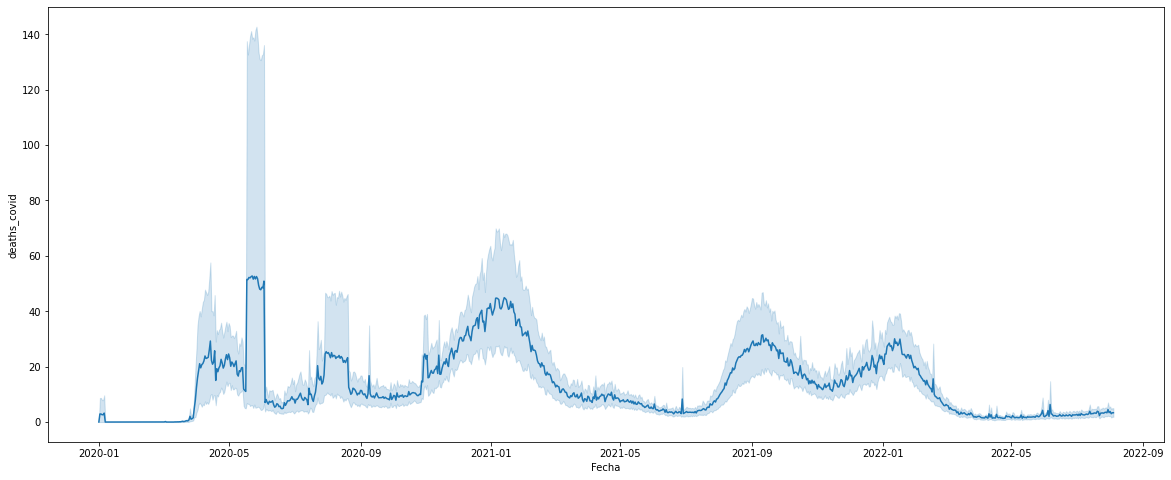

In [95]:
#.sort_values(by='total_patients_hospitalized_confirmed_covid', ascending=False).head()
plt.figure(figsize = (20,8))
sns.lineplot(x = 'Fecha', y = 'deaths_covid',data = relacion)

plt.savefig("deaths_covid.jpg", bbox_inches='tight')



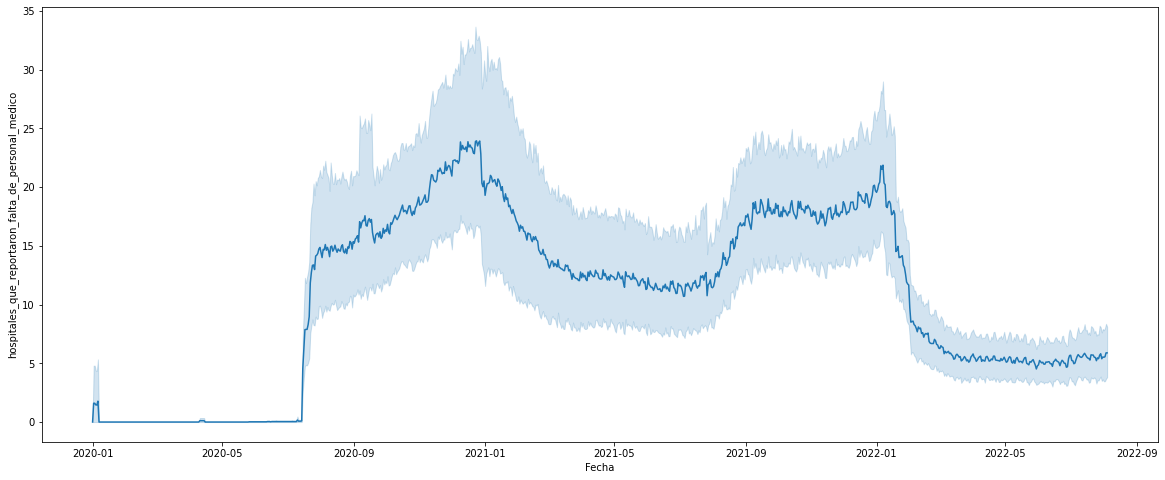

In [96]:

plt.figure(figsize = (20,8))
sns.lineplot(x = 'Fecha', y = 'hospitales_que_reportaron_falta_de_personal_medico',data = relacion)

plt.savefig("falta_de_personal.jpg", bbox_inches='tight')

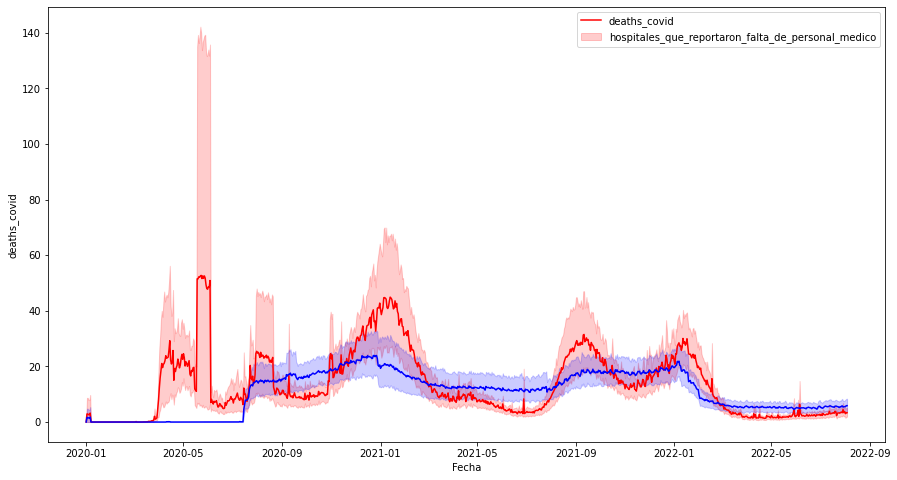

In [97]:
import seaborn as sns
s1 = sns.lineplot(x = 'Fecha', y = 'deaths_covid', data = relacion, color = 'red')

s2 = sns.lineplot(x = 'Fecha', y = 'hospitales_que_reportaron_falta_de_personal_medico', data = relacion, color = 'blue')

plt.legend(labels = ['deaths_covid','hospitales_que_reportaron_falta_de_personal_medico'])
plt.gcf().set_size_inches(15, 8)

plt.savefig("relacion_muertes_falta_de_personal.jpg", bbox_inches='tight')

#### 8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

El peor mes de la pandemia fue el 21-01 que fue el mes que mas hubo Muertes por covid. Y tambien fue donde hubo reporte de falta de personal Medico

#### 9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

Con respecto a los recursos hospilatarios, recomendaria una mayor inversión en temas de recursos, para futuros problemas como lo que paso con pandemia, recursos como camas, respiradores, etc.
Se recomienda tambien contar con una mayor de personal capacitado, para tiempos de pandemía, que fueron bastantes escasos en comparación a como a sucedido la pandemia por COVID